In [47]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [48]:
HERE = Path().parent

In [49]:
X = pd.read_csv(f"{HERE}/donnees/X.txt", sep=" ", header=None)
APPART = pd.read_csv(f"{HERE}/donnees/APPART.txt", sep=" ", header=None)
JOUR = pd.read_csv(f"{HERE}/donnees/JOUR.txt", sep=" ", header=None)

In [50]:
X

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.786785,-1.759306,-1.731826,-1.657497,-1.504801,-1.303554,-1.099353,-0.939600,-0.834307,-0.642136,...,1.796293,1.746644,1.617929,1.374530,0.991029,0.564313,0.200768,-0.077526,-0.276923,-0.433195
1,-0.394478,-0.634234,-0.873990,-1.012224,-0.992106,-0.935577,-0.966903,-1.040886,-1.074217,-1.000619,...,0.835603,0.970470,1.115326,1.143106,0.943505,0.560883,0.094956,-0.287792,-0.456911,-0.492853
2,-1.216742,-1.395422,-1.574103,-1.741657,-1.879992,-1.943143,-1.897188,-1.784239,-1.650855,-1.485354,...,1.153940,1.267196,1.333831,1.347890,1.308287,1.199404,1.006899,0.736046,0.401007,0.031883
3,-0.796512,-1.189678,-1.582845,-1.883616,-2.029875,-2.080617,-2.097591,-2.032449,-1.835092,-1.558510,...,1.156785,1.309893,1.248746,1.033263,0.756840,0.522058,0.398940,0.318105,0.197855,0.046630
4,-0.077746,-0.709023,-1.340300,-1.873472,-2.216010,-2.297673,-2.089215,-1.703073,-1.269871,-0.851312,...,1.526477,1.661399,1.647645,1.470649,1.130163,0.676563,0.177488,-0.281004,-0.634296,-0.921962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,-1.373892,-1.611674,-1.849456,-2.037723,-2.138310,-2.158456,-2.107608,-1.958650,-1.691850,-1.353598,...,0.529951,0.485765,0.556992,0.652746,0.672439,0.626687,0.549977,0.461084,0.372155,0.284557
9096,-1.061133,-1.326168,-1.591203,-1.909054,-2.301337,-2.664871,-2.876890,-2.861083,-2.578586,-2.093864,...,0.998410,1.241800,1.266223,1.095714,0.790980,0.405643,0.011605,-0.239013,-0.229034,-0.061260
9097,-0.703021,-0.931821,-1.160621,-1.357542,-1.493810,-1.553057,-1.536860,-1.506154,-1.502012,-1.426687,...,1.005878,0.941988,0.802163,0.677693,0.636938,0.584028,0.414505,0.153798,-0.147069,-0.464579
9098,-0.687142,-0.963776,-1.240411,-1.459325,-1.576649,-1.603905,-1.569288,-1.512294,-1.474450,-1.494115,...,0.660649,0.686355,0.658493,0.573240,0.422843,0.215098,-0.032531,-0.279474,-0.491025,-0.679058


## Transformation du tableau X en un tableau de données catégorielles

L’objectif de cette partie est de regrouper les lignes du tableau X en K classes, puis, à partir des labels des classes, de transformer les données journalières initiales (X) en un tableau de données catégorielles Y (100 lignes et 91 colonnes).


X (en ligne les jours tout appartement confondu, en colonne chaque pas de 30 min)

In [51]:
# couleur 
red = "#962428"
yellow = "#fefdc5"
blue = "#374b99"
green = "#7db9ab"

### KMeans

In [52]:
from sklearn.cluster import KMeans

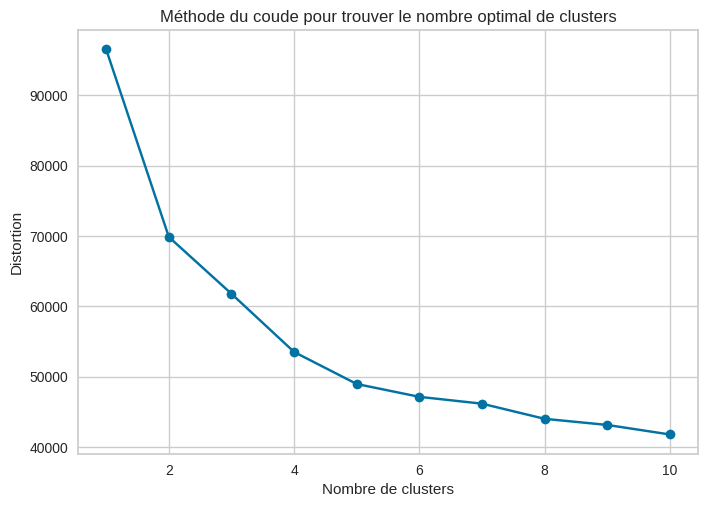

In [53]:
# Méthode du coude pour trouver le nombre optimal de clusters
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Visualisation
plt.plot(K_range, distortions, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distortion')
plt.show()

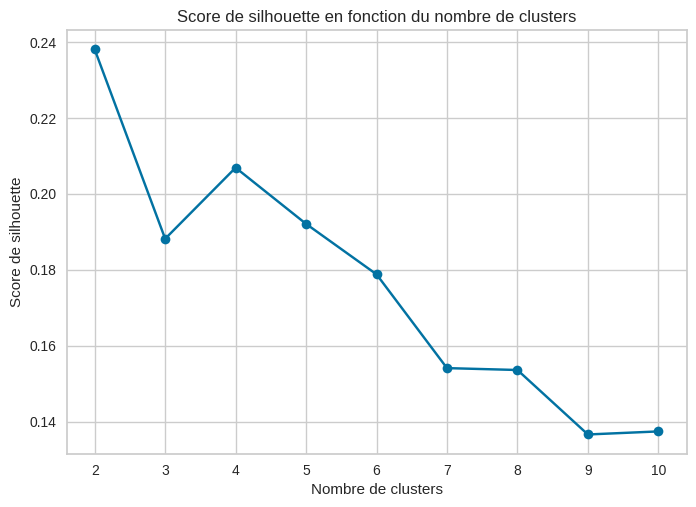

In [54]:
# dessiner le score de silhouette en fonction du nombre de clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualisation
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

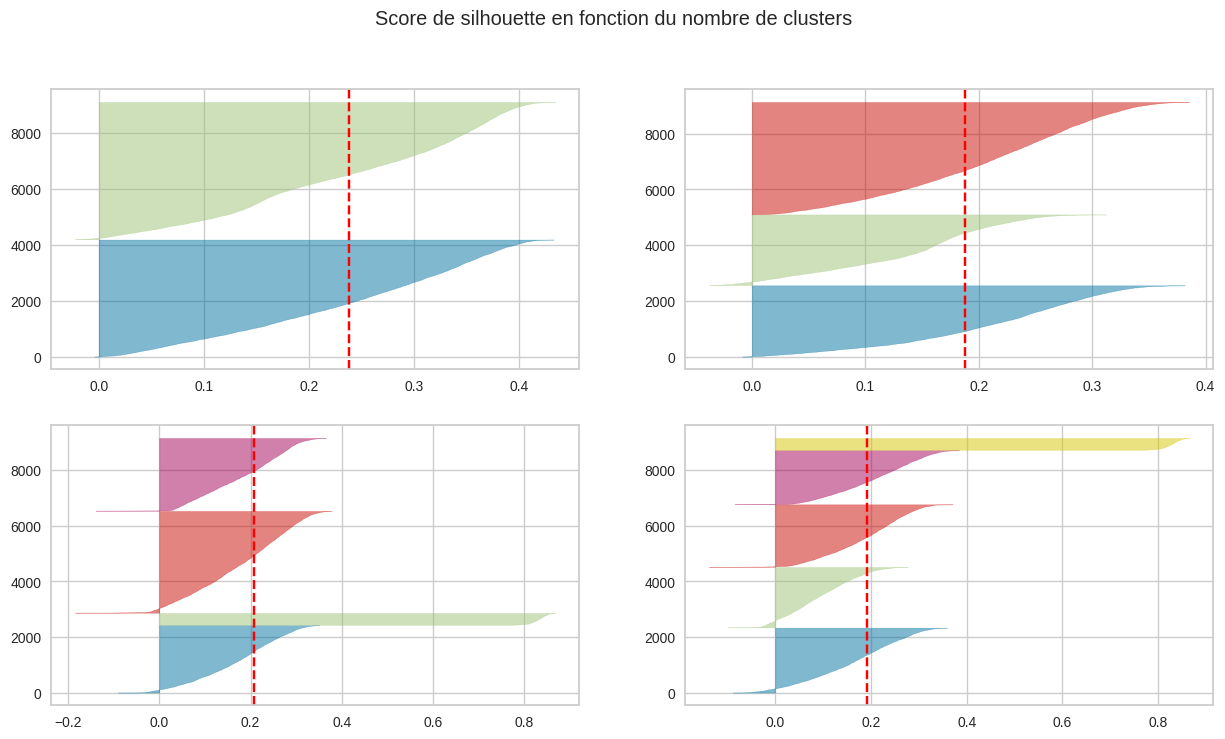

In [55]:
# Une autre visualisation du score de silhouette en fonction du nombre de clusters
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X)

# Visualisation
plt.suptitle('Score de silhouette en fonction du nombre de clusters')
plt.show()






In [73]:
# Define custom colors
red = "#962428"
yellow = "#fefdc5"
blue = "#374b99"
green = "#7db9ab"

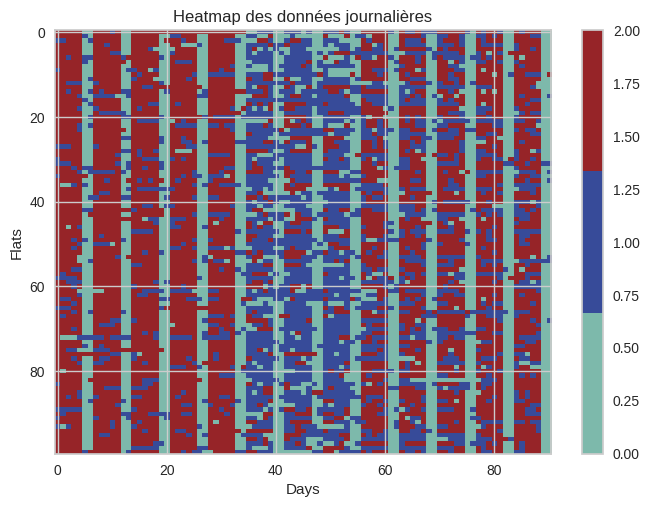

In [97]:
# Assuming X is already defined
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)

Y = pd.DataFrame(columns=range(91))
for i in range(100):
    Y.loc[i] = kmeans.labels_[i * 91: (i + 1) * 91]

# Create a colormap with the custom colors
couleurs = ListedColormap([green, blue, red])

plt.imshow(Y, aspect='auto', cmap=couleurs)

# Annotate axes
plt.xlabel('Days')
plt.ylabel('Flats')

plt.colorbar()

plt.title('Heatmap des données journalières')

plt.show()

## Classification des 91 jours en partant du tableau de données catégorielles Y

Text(0.5, 1.0, 'Heatmap des données journalières')

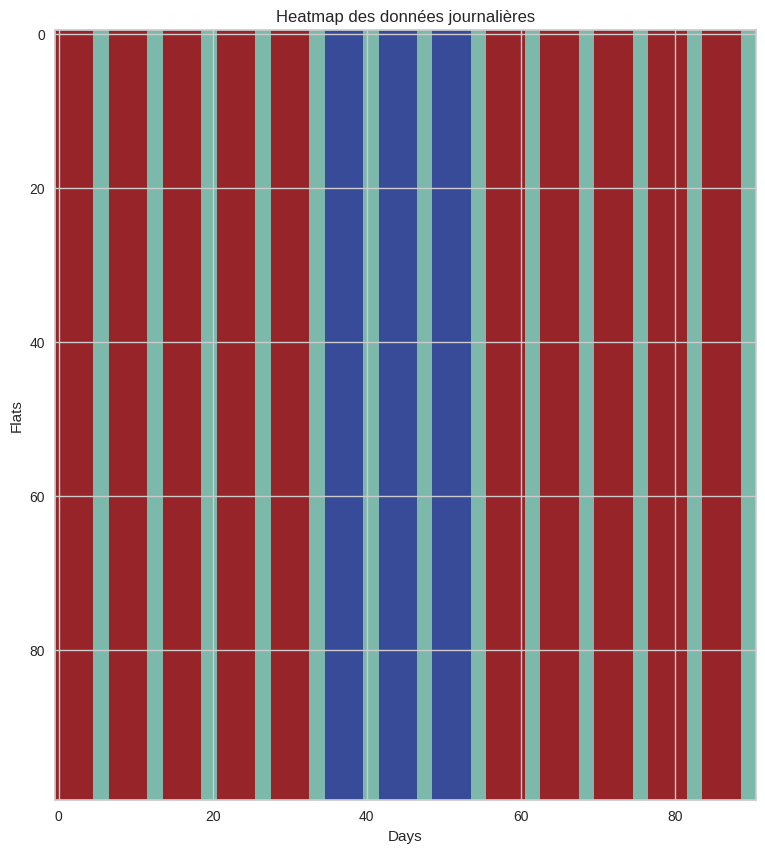

In [98]:
# classification des 91 jours en 3 clusters en utilisant CAH en partant tableau de données catégorielles Y
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Assuming Y is already defined
clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
clustering.fit(Y.T)

# Create a colormap with the custom colors
couleurs = ListedColormap([red, green, blue ])

plt.figure(figsize=(20, 10))
plt.imshow(np.tile(clustering.labels_, (100, 1)), cmap=couleurs)

# Annotate axes
plt.xlabel('Days')
plt.ylabel('Flats')

plt.title('Heatmap des données journalières')